# TP0 - Regresión lineal

## Enunciado 

<image src="https://github.com/walteraguirre/TPS/blob/main/TP01/imagenes/ej_a.png?raw=true" alt="Descripción de la imagen">





# Esperanza condicional

Por definicion la esperanza condicional la podemos calcular de la siguiente manera:

$E[Y|X = x] = \int ^{\infty} _{- \infty} y \ f_{Y|X = x}(y) \ dy$

Donde $f_{Y|X = x}(y)$ la podemos obtener de la siguiente manera:

1) $f_{Y|X = x}(y) = \frac{p_{XY}(x, y)}{p_X(x)}$

Debemos obtener la densidad marginal $p_X(x)$:

$p_X(x) = \int ^{\infty} _{- \infty} p_{XY}(x,y) dy = \int ^{1+x^2} _0 \frac{3}{4} dy = \frac{3}{4} (1+x^2)$

Reemplazando en 1 llegamos a que:

$f_{Y|X = x}(y) = \frac{p_{XY}(x, y)}{p_X(x)} = \frac{\frac{3}{4}}{\frac{3}{4} (1+x^2)} = \frac{1}{1+x^2}$

Por ultimo procedemos a calcular la esperanza condicional:

$E[Y|X = x] = \int ^{\infty} _{- \infty} y \quad f_{Y|X = x}(y) \quad dy = \frac{\int ^{\infty} _{- \infty} y \ dy}{1+x^2} = \frac{\frac{1}{2}(1+x^2)^2}{1+x^2} = \frac{1}{2} (1+x^2)$

Por lo tanto la esperanza condicional de Y dado X es: $E[Y|X=x] = \frac{1}{2}(1+x^2)$




# Error bayesiano

Por definicion, el error bayesiano se calcula de la siguiente manera: $E[var(Y|X)]$.

Procedemos a calcular primero $var(Y|X)$. Por propiedades de la varianza sabemos que:

$var(Y) = E[var(Y|X)] + var(E[Y|X])$

Despejando $E[var(Y|X)]$, obtenemos la siguiente expresión:

1) $E[var(Y|X)] = var(Y) - var(E[Y|X])$

Nuevamente, aplicando propiedades de la varianza, podemos calcular $var(Y)$ con la siguiente expresion:

2) $var(Y) = E[Y^2] - E^2[Y]$  

$E[Y] = E[E[Y|X]] = E[\frac{1}{2}(1+X^2)] = \frac{1}{2}(1 + E[X^2]) = \frac{1}{2}(1 + \int ^1 _0 x^2 \ p_X(x) \ dx) = \frac{1}{2}(1 + \int ^1 _0 x^2 \ \frac{3}{4}(1+x^2) \ dx)$

$E[Y] = \frac{1}{2}(1 +\frac{3}{4} \ \int ^1 _0 (x^2+x^4) \ dx) = \frac{1}{2}(1 +\frac{3}{4} \ (\frac{1}{3} + \frac{1}{5})) = \frac{7}{10}$

Luego pasamos a calcular $E[]$

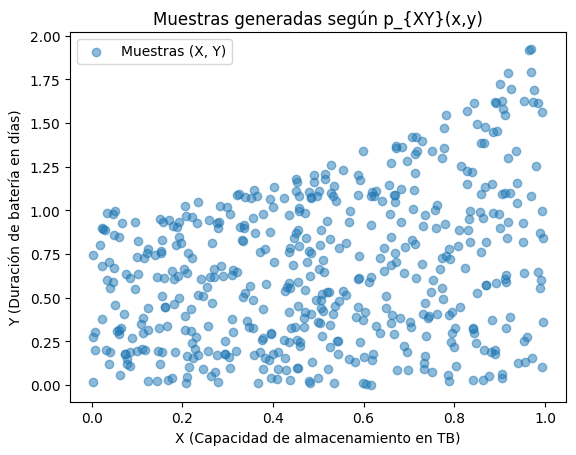

In [116]:
#librerias
import numpy as np
import matplotlib.pyplot as plt

#cantidad de muestras para el dataset
N = 500

#genero 500 datos de X con distribucion uniforme en el intervalo 0<x<1

X = np.random.uniform(0,1,N)

#a partir de los datos de X, generamos los datos de Y, sabiendo que Y ~ U(0,1+x^2). 

Y = np.random.uniform(0, 1+X**2, N)

# Graficar los puntos generados
plt.scatter(X, Y, alpha=0.5, label="Muestras (X, Y)")
plt.xlabel("X (Capacidad de almacenamiento en TB)")
plt.ylabel("Y (Duración de batería en días)")
plt.title("Muestras generadas según p_{XY}(x,y)")
plt.legend()
plt.show()

In [117]:
#Nos piden implementar una regresion lineal matricial.
#Defino la clase regresion lineal

class regresion_lineal:
    #Inicializador
    def __init__(self):
        self.w_ = None
        self.b_ = None

    #Etapa de entrenamiento
    def fit(self, X, y):
        #agrego una columna de unos para luego poder resolver la regresion lineal de forma matricial
        X_bias = np.c_[np.ones(X.shape[0]), X]

        # Resuelvo la ecuación normal: W = (X^T X)^(-1) X^T y
        W = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

        #de W obtengo los parametros b y w
        self.b_ = W[0]
        self.w_ = W[1]

    #Etapa de testeo
    def predict(self, X):
        #agrego una columna de unos 
        X_bias = np.c_[np.ones(1), X]

        #resuelvo el producto matricial
        return X_bias @ np.r_[self.b_, self.w_]
    
    #Metodo para obtener los parametros b y w
    def get_param(self):
        return self.b_, self.w_
    
#una vez definida la clase, pasamos a entrenar el regresor con los datos generados previamente

#generamos una instancia del regresor
reglin = regresion_lineal()

#entrenamos el regresor con los datos generados
reglin.fit(X,Y)

#obtenemos los parametros
b, w = reglin.get_param()

print(f"w = : {w}")
print(f"b = : {b}")




w = : 0.47859950520216155
b = : 0.41597274546990926


In [118]:
#una vez entrenado el regresor, nos piden predecir la duracion de una bateria de 256GB

x = 0.256 #duracion de la bateria en TB

y_hat = reglin.predict(x) #estimacion de la duracion de la bateria a partir del regresor

print(f"Duracion de la bateria estimada : {y_hat}")

Duracion de la bateria estimada : [0.53849422]
